In [228]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


In [229]:
# import data as dataframe
wind_citypop_df = pd.read_csv("../Resources/wind_citypop.csv") 
wind_citypop_df = wind_citypop_df.drop(['Unnamed: 0'],axis=1) 

wind_citypop_df.head()


,ID,Element,State,Value,Latitude,Longitude,Elevation,City/Town/County,Density
0,USC00050109,AWND,CO,47.200534,40.1550,-103.1417,1384.4,Akron,255.0
1,USC00052947,AWND,CO,40.141416,40.6483,-102.8594,1297.2,Fleming,296.0
2,USC00053261,AWND,CO,44.030606,39.7053,-105.6997,2596.9,Georgetown,422.0
3,USC00116344,AWND,IL,36.978536,40.1100,-87.9567,205.7,Ogden,544.0
4,USC00185934,AWND,MD,42.654162,39.7194,-76.8028,262.1,Carrol County,374.0


In [230]:
wind_citypop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 449 entries, 0 to 448
Data columns (total 9 columns):
ID                  449 non-null object
Element             449 non-null object
State               449 non-null object
Value               449 non-null float64
Latitude            449 non-null float64
Longitude           449 non-null float64
Elevation           449 non-null float64
City/Town/County    448 non-null object
Density             449 non-null float64
dtypes: float64(5), object(4)
memory usage: 31.6+ KB


In [231]:
# We Keep data which population Density no more then 500
wind_citypop_df= wind_citypop_df[wind_citypop_df['Density']<=500.0]
wind_state_df =wind_citypop_df.groupby('State')['City/Town/County'].count()
wind_state_df = wind_state_df.reset_index() 
wind_state_df.head()

,State,City/Town/County
0,AK,22
1,AR,1
2,AZ,5
3,CA,5
4,CO,8


In [232]:
# create x_axis and ticks locations
x_axis=np.arange(len(wind_state_df))
tick_locations = [i for i in x_axis ]

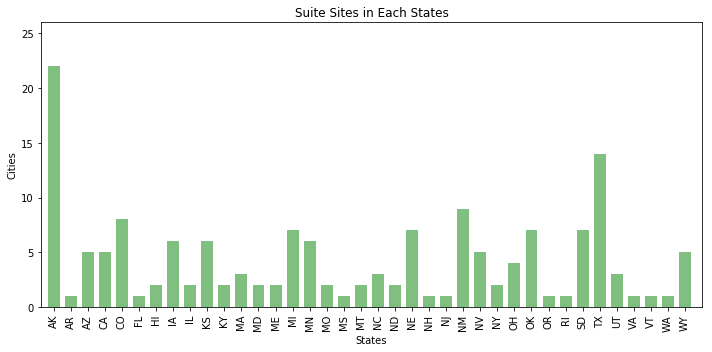

In [216]:
# Create a bar chart based on wind_state_df
plt.figure(figsize=(10,5))
plt.bar(x_axis,wind_state_df['City/Town/County'],color='g', alpha=0.5, align="center",width=0.7)
plt.xticks(tick_locations, wind_state_df["State"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(wind_state_df['City/Town/County'])+4)

# Set title , xlabel, ylabel
plt.xlabel('States')
plt.ylabel('Cities')
plt.title("Suite Sites in Each States")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Image/Suite Sites in Each States.png")
plt.show()


In [217]:
#import other csv file as dataframe
# Energy Census and Economic Data US 2010-2014
Energy_Census_df = pd.read_csv('../Resources/Energy Census and Economic Data US 2010-2014.csv')
Energy_Census_df.head()

,StateCodes,State,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,RINTERNATIONALMIG2013,RINTERNATIONALMIG2014,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014
0,AL,Alabama,3.0,6.0,1.0,0.0,1931522,1905207,1879716,1919365,...,1.165832,1.157861,-0.020443,-0.168414,0.396416,0.420102,1.011941,1.001333,1.562247,1.577963
1,AK,Alaska,4.0,9.0,1.0,0.0,653221,653637,649341,621107,...,3.203618,2.869760,-1.175137,-1.949571,-3.789313,-13.754494,0.948185,1.835376,-0.585695,-10.884734
2,AZ,Arizona,4.0,8.0,0.0,0.0,1383531,1424944,1395839,1414383,...,1.090035,1.091283,1.341472,-0.420875,-0.580562,-1.313050,2.317801,0.621971,0.509473,-0.221767
3,AR,Arkansas,3.0,7.0,0.0,0.0,1120632,1122544,1067642,1096438,...,2.141877,2.129805,1.369514,5.131282,3.910476,6.280636,3.336628,7.155212,6.052353,8.410441
4,CA,California,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,4.207353,4.177389,-1.162079,-1.173951,-1.341226,-0.830982,2.761377,2.772770,2.866127,3.346406


In [218]:

# 14,000 British thermal units (Btu) per pound
# coal carbon content of 78 percent
# 204.3 pounds of carbon dioxide per million Btu when completely burned
# Source: https://www.eia.gov/coal/production/quarterly/co2_article/co2.html

# 204.3 lb /1 million BTU
# 204300 lb /1 billion BTU
# 2000 lb/ 1 tons
#Coal total consumption in billion BTU in 2014
Coal_2014consump_df = Energy_Census_df[["StateCodes","CoalC2014"]]
Coal_2014consump_df['CoalC2014'] = (Coal_2014consump_df['CoalC2014']*204300)/2000
Coal_2014consump_df['CoalC2014']= round(Coal_2014consump_df['CoalC2014'], -1)
Coal_2014consump_df.head()

C:\Users\fawnz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\fawnz\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



,StateCodes,CoalC2014
0,AL,58829410.0
1,AK,1861680.0
2,AZ,45747780.0
3,AR,34650710.0
4,CA,4033490.0


In [219]:
# Delete the unwanted rows
Coal_2014consump_df = Coal_2014consump_df[Coal_2014consump_df['StateCodes']!= 'US']
Coal_2014consump_df = Coal_2014consump_df.rename(columns={'StateCodes':"State"})

In [221]:

data = dict(type = 'choropleth',
            colorscale = 'Bluered',
            locations = Coal_2014consump_df['State'],
            locationmode = 'USA-states',
            z = Coal_2014consump_df['CoalC2014'],
            text = Coal_2014consump_df['State'],
            marker = dict(line = dict(color = 'rgb(255,255,255)', width = 2)),
            colorbar = {'title': 'Tons of C02'})

In [222]:
layout = dict(title = 'C02 Production by Coal in 2014',
             geo = dict(scope = 'usa',showlakes = True, lakecolor = 'rgb(85, 173, 240)'))

In [223]:
choromap = go.Figure(data = [data], layout=layout)
iplot(choromap)
plt.savefig("../Image/C02 Production by Coal in 2014.png")



<Figure size 432x288 with 0 Axes>

In [224]:
# 
wind_state_df_2 = wind_citypop_df.groupby('State')['Value'].sum()
wind_state_df_2 = wind_state_df_2.reset_index()


In [225]:
# Combine two dataframes
wind_state_df_2 = wind_state_df_2.merge(Coal_2014consump_df,on='State',how='left')
wind_state_df_2.head()

,State,Value,CoalC2014
0,AK,1137.522218,1861680.0
1,AR,37.597995,34650710.0
2,AZ,193.370290,45747780.0
3,CA,197.956969,4033490.0
4,CO,367.150499,35806230.0


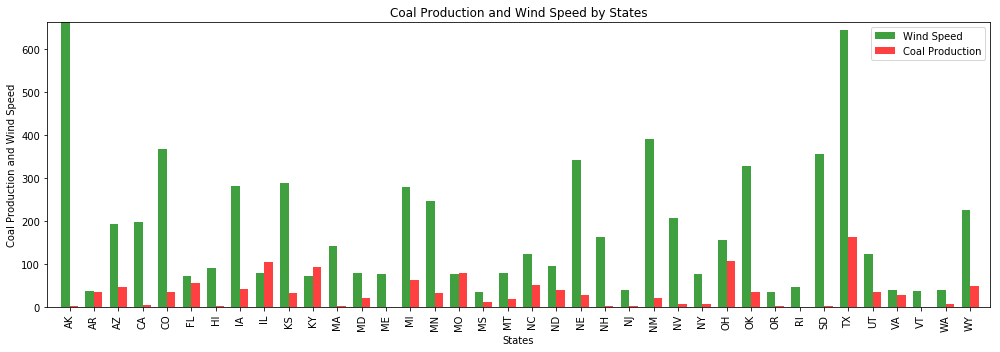

In [234]:
# Plot the windspeed and coal consumption by states
# create x_axis and ticks locations
x_axis=np.arange(len(wind_state_df_2))
tick_locations = [i+0.175 for i in x_axis ]

# Create a bar chart based on wind_state_df_2
plt.figure(figsize=(14,5))
plt.bar(x_axis,wind_state_df_2['Value'],color='green', alpha=0.75, align="center",width =0.35,label='Wind Speed')
plt.bar(x_axis+0.35,wind_state_df_2['CoalC2014']/1000000,color='red', alpha=0.75, align="center",width =0.35,label='Coal Production')
plt.xticks(tick_locations, wind_state_df["State"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(wind_state_df_2['CoalC2014']/1000000)+500)

# Set title , xlabel, ylabel
plt.xlabel('States')
plt.ylabel('Coal Production and Wind Speed')
plt.title("Coal Production and Wind Speed by States")
plt.legend()

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../Image/Coal Production and Wind Speed by States.png")

